In [120]:
import pandas as pd
import numpy as np
import requests
#!conda install -c conda-forge folium
import folium
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

## Importing & Cleaning Data

In [4]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_a4b0c898aa3f4883aca8e74d32aaffcb = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_a4b0c898aa3f4883aca8e74d32aaffcb = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

client_a4b0c898aa3f4883aca8e74d32aaffcb = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='yRFEtzrjB-X4XurSQrJ5ylABO9edl2HOFYwIYYxPwZ0B',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_a4b0c898aa3f4883aca8e74d32aaffcb)

body = client_a4b0c898aa3f4883aca8e74d32aaffcb.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-rwwcdtuutw9v7q',Key='worldcities.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

cities = pd.read_csv(body, low_memory=False)

body = client_a4b0c898aa3f4883aca8e74d32aaffcb.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-rwwcdtuutw9v7q',Key='daily_temperature_1000_cities_1980_2020.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

temp_df = pd.read_csv(body)

body = client_a4b0c898aa3f4883aca8e74d32aaffcb.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-rwwcdtuutw9v7q',Key='Cost_of_living_index.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

cost_df = pd.read_csv(body)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,24

In [5]:
cities_data = cities[['city', 'lat', 'lng', 'population']]
columns = ['City', 'Latitude', 'Longitude', 'Population']
cities_data.columns = columns
cities_data

,City,Latitude,Longitude,Population
0,Tokyo,35.6897,139.6922,37977000.0
1,Jakarta,-6.2146,106.8451,34540000.0
2,Delhi,28.6600,77.2300,29617000.0
3,Mumbai,18.9667,72.8333,23355000.0
4,Manila,14.5958,120.9772,23088000.0
...,...,...,...,...
26564,Nord,81.7166,-17.8000,10.0
26565,Timmiarmiut,62.5333,-42.2167,10.0
26566,Cheremoshna,51.3894,30.0989,0.0
26567,Ambarchik,69.6510,162.3336,0.0


In [6]:
temp_data = temp_df.transpose()
temp_data.columns = temp_data.iloc[0]
temp_data = temp_data.drop(temp_data.index[0])
temp_data = temp_data.drop(['city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3', 'admin_name', 'capital', 'population', 'id', 'datetime'], axis=1)
df = temp_data.loc[:, '1980-01-01':'2020-09-30']
df = df.astype(float)
df['Average Temp'] = df.mean(numeric_only=True, axis=1, skipna=True)
df['Max Temp'] = df.max(numeric_only=True, axis=1, skipna=True)
df['Min Temp'] = df.min(numeric_only=True, axis=1, skipna=True)
temp_data['Average Temp'] = df['Average Temp']
temp_data['Max Temp'] = df['Max Temp']
temp_data['Min Temp'] = df['Min Temp']
#temp_data = temp_data.drop(temp_data.loc[:, '1980-01-01':'2020-09-30'])
temp_data = temp_data[['city', 'Average Temp', 'Max Temp', 'Min Temp']]
columns = ['City', 'Average Temp', 'Max Temp', 'Min Temp']
temp_data.columns = columns
temp_data

,City,Average Temp,Max Temp,Min Temp
0,Tokyo,15.748201,32.39,-5.11
1,New York,12.402294,31.67,-16.92
2,Mexico City,14.985392,22.56,5.67
3,Mumbai,26.548575,31.46,18.60
4,São Paulo,19.806856,28.66,7.09
...,...,...,...,...
995,Yangzhou,15.865681,33.81,-7.81
996,Novokuznetsk,2.344670,27.85,-44.01
997,Latakia,19.245169,30.84,2.02
998,Heroica Matamoros,23.630688,31.81,-4.05


In [7]:
cost_data = cost_df[['City', 'Rent Index', 'Groceries Index', 'Restaurant Price Index']]
cost_data['City'] = cost_data['City'].str.split(',').str[0]
cost_data

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,City,Rent Index,Groceries Index,Restaurant Price Index
0,Hamilton,103.03,126.56,151.77
1,Zurich,62.62,127.35,127.14
2,Basel,46.14,120.44,129.10
3,Lausanne,50.35,116.35,122.83
4,Bern,39.22,114.54,114.86
...,...,...,...,...
531,Vadodara,3.78,22.26,14.43
532,Kochi,5.45,21.93,12.20
533,Visakhapatnam,4.26,21.09,17.09
534,Navi Mumbai,4.70,19.21,12.55


In [125]:
cities = pd.merge(cities_data, cost_data, on='City', how='outer')
cities = pd.merge(cities, temp_data, on='City', how='outer')
cities = cities.dropna()
cities = cities.drop_duplicates(subset = 'City')
cities

,City,Latitude,Longitude,Population,Rent Index,Groceries Index,Restaurant Price Index,Average Temp,Max Temp,Min Temp
0,Tokyo,35.6897,139.6922,37977000.0,36.41,81.72,54.41,15.748201,32.39,-5.11
1,Jakarta,-6.2146,106.8451,34540000.0,15.80,41.08,24.79,26.945059,29.56,24.32
2,Delhi,28.6600,77.2300,29617000.0,8.73,25.80,25.30,24.774463,40.34,5.92
4,Mumbai,18.9667,72.8333,23355000.0,20.31,26.63,26.36,26.548575,31.46,18.60
5,Manila,14.5958,120.9772,23088000.0,15.80,31.73,24.11,27.631514,32.23,22.12
...,...,...,...,...,...,...,...,...,...,...
3012,Porto,41.1495,-8.6108,237591.0,21.87,39.50,42.58,15.221466,29.28,2.96
3055,Lille,50.6278,3.0583,232787.0,22.98,52.70,66.87,10.797798,30.10,-13.75
3292,Geneva,46.2000,6.1500,201818.0,69.16,112.08,119.78,9.242442,27.48,-16.67
3608,Basel,47.5606,7.5906,177595.0,46.14,120.44,129.10,9.885712,28.22,-16.77


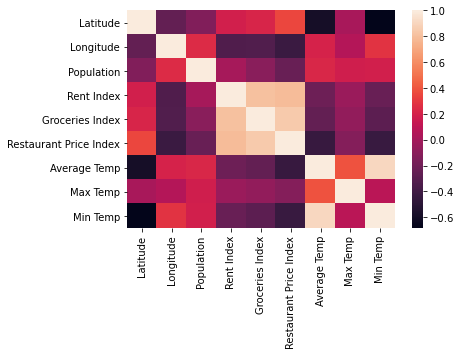

In [126]:
sns.heatmap(cities.corr());


In [9]:
world_map = folium.Map()

for lat, lng, city in zip(cities['Latitude'], cities['Longitude'], cities['City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(world_map)  
    
world_map

In [17]:
CLIENT_ID = '4MEIMNBDTUBNJGG34VHL0KZBAXUN4KH0VQFLIMKML2E0IHUQ' # your Foursquare ID
CLIENT_SECRET = 'JTC1O3YA3XC1ZMAM25GYCUABDZ3A13WHUY25SLMUHXIV1CWZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
cities_venues = getNearbyVenues(names=cities['City'],
                                   latitudes=cities['Latitude'],
                                   longitudes=cities['Longitude'])

Tokyo
Jakarta
Delhi
Mumbai
Manila
Shanghai
Seoul
Mexico City
Guangzhou
Beijing
Cairo
New York
Moscow
Bangkok
Buenos Aires
Shenzhen
Dhaka
Lagos
Istanbul
Karachi
Tehran
Ho Chi Minh City
Los Angeles
Rio de Janeiro
Chennai
Chengdu
Lahore
Paris
London
Lima
Chicago
Kuala Lumpur
Hanoi
Pune
Hong Kong
Santiago
Riyadh
Dar es Salaam
Miami
Baghdad
Singapore
Dallas
Suzhou
Philadelphia
Nairobi
Ankara
Houston
Atlanta
Toronto
Washington
Saint Petersburg
Sydney
Guadalajara
Belo Horizonte
Melbourne
Surabaya
Alexandria
Boston
Barcelona
Johannesburg
Casablanca
Monterrey
Phoenix
Amman
Seattle
Berlin
San Francisco
Detroit
Algiers
Madrid
San Diego
Jaipur
Addis Ababa
Minneapolis
Quezon City
Bursa
Tampa
Birmingham
Denver
Rome
Taichung
Kaohsiung
Guayaquil
Manchester
Taipei
Santo Domingo
Brooklyn
Brisbane
Dubai
Cali
Guatemala City
Antalya
Tashkent
Bandung
Tijuana
Accra
Vancouver
Indore
Baku
Havana
Phnom Penh
Baltimore
Las Vegas
Portland
Vadodara
Perth
San Antonio
Minsk
Quito
Caracas
Leeds
Sacramento
Bucharest
Cu

In [22]:
cities_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tokyo,35.6897,139.6922,South Observatory (東京都庁 南展望室),35.689290,139.691821,Scenic Lookout
1,Tokyo,35.6897,139.6922,North Observatory (東京都庁 北展望室),35.689797,139.691654,Scenic Lookout
2,Tokyo,35.6897,139.6922,Park Hyatt Tokyo (パークハイアット東京),35.685575,139.690639,Hotel
3,Tokyo,35.6897,139.6922,Shin (慎),35.686489,139.697001,Udon Restaurant
4,Tokyo,35.6897,139.6922,Dashi-chazuke En (だし茶漬け えん),35.691622,139.698747,Japanese Restaurant


In [23]:
# one hot encoding
cities_onehot = pd.get_dummies(cities_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cities_onehot['City'] = cities_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [cities_onehot.columns[-1]] + list(cities_onehot.columns[:-1])
cities_onehot = cities_onehot[fixed_columns]

cities_grouped = cities_onehot.groupby('City').mean().reset_index()
cities_grouped

,City,Zoo Exhibit,ATM,Acai House,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,...,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yemeni Restaurant,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,Abu Dhabi,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.000000,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.01,0.0,0.0,0.00
1,Accra,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.079365,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00
2,Addis Ababa,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00
3,Adelaide,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,...,0.01,0.00,0.00,0.0,0.01,0.0,0.00,0.0,0.0,0.01
4,Albany,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,...,0.00,0.00,0.01,0.0,0.00,0.0,0.02,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Winnipeg,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00
283,Yekaterinburg,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,...,0.02,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00
284,Yerevan,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,...,0.00,0.01,0.00,0.0,0.00,0.0,0.01,0.0,0.0,0.01
285,Yogyakarta,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00


In [24]:
cities_complete = pd.merge(cities, cities_grouped,  on='City', how='outer')
cities_complete = cities_complete.drop(['Latitude', 'Longitude'], axis=1)
cities_complete

,City,Population,Rent Index,Groceries Index,Restaurant Price Index,Average Temp,Max Temp,Min Temp,Zoo Exhibit,ATM,...,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yemeni Restaurant,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,Tokyo,37977000.0,36.41,81.72,54.41,15.748201,32.39,-5.11,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,Jakarta,34540000.0,15.80,41.08,24.79,26.945059,29.56,24.32,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,Delhi,29617000.0,8.73,25.80,25.30,24.774463,40.34,5.92,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,Mumbai,23355000.0,20.31,26.63,26.36,26.548575,31.46,18.60,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,Manila,23088000.0,15.80,31.73,24.11,27.631514,32.23,22.12,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Porto,237591.0,21.87,39.50,42.58,15.221466,29.28,2.96,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
283,Lille,232787.0,22.98,52.70,66.87,10.797798,30.10,-13.75,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
284,Geneva,201818.0,69.16,112.08,119.78,9.242442,27.48,-16.67,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
285,Basel,177595.0,46.14,120.44,129.10,9.885712,28.22,-16.77,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01


In [25]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cities_complete.drop(['City'], axis=1))
scaled_data = pd.DataFrame(scaled_data)
columns = cities_complete.drop(['City'], axis = 1).columns
columns
scaled_data.columns = columns

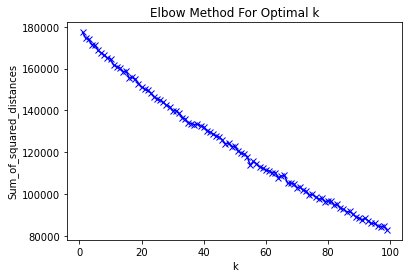

In [26]:

Sum_of_squared_distances = []
K = range(1,100)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [34]:
# set number of clusters
kclusters = 11

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(scaled_data)
clustered_data = cities
clustered_data['Cluster Labels'] = kmeans.labels_

# create map
map_clusters = folium.Map()

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cities['Latitude'], cities['Longitude'], cities['City'], cities['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.95)
pca.fit(scaled_data)
PCA_data = pd.DataFrame(pca.transform(scaled_data))

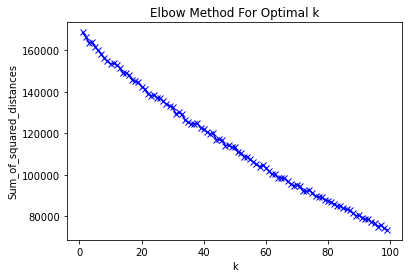

In [36]:
Sum_of_squared_distances = []
K = range(1,100)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(PCA_data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [117]:
#finding the most similar datapoint....

def nearest_city(City, n):
    X = np.array(scaled_data)
    knn = NearestNeighbors(n_neighbors=(n+1))
    NearestNeighbors(algorithm='auto', leaf_size=30, n_neighbors=5, p=2, radius=1.0)
    knn.fit(X)
    neighbors = knn.kneighbors(X, return_distance=False)
    index = cities_complete.index[cities['City'] == City].tolist()
    
    Nearest_cities = []

    for i in neighbors[index]:
        Nearest_cities.append(cities.iloc[i].City)
    
    print(Nearest_cities)

In [118]:
nearest_city('Tokyo', 3)

[0                  Tokyo
547                Leeds
32      Ho Chi Minh City
1553           Stuttgart
Name: City, dtype: object]
